## 构建简单的CNN对 mnist 数据集进行分类。
首先导入所需要的包。

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

# 一个函数，用来计算模型中有多少参数
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

# 使用GPU训练，可以在菜单 "代码执行工具" -> "更改运行时类型" 里进行设置
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

PyTorch里包含了 MNIST， CIFAR10 等常用数据集，调用 torchvision.datasets 即可把这些数据由远程下载到本地，下面给出MNIST的使用方法：

torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)

· root 为数据集下载到本地后的根目录，包括 training.pt 和 test.pt 文件
train，如果设置为True，从training.pt创建数据集，否则从test.pt创建。

· download，如果设置为True, 从互联网下载数据并放到root文件夹下

· transform, 一种函数或变换，输入PIL图片，返回变换之后的数据。

· target_transform 一种函数或变换，输入目标，进行变换。

另外值得注意的是，DataLoader是一个比较重要的类，提供的常用操作有：batch_size(每个batch的大小), shuffle(是否进行随机打乱顺序的操作), num_workers(加载数据的时候使用几个子进程)

In [ ]:
input_size  = 28*28   # MNIST上的图像尺寸是 28x28
output_size = 10      # 类别为 0 到 9 的数字，因此为十类

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
        transform=transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
             transforms.ToTensor(),
             transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=1000, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


显示数据集中的部分图像

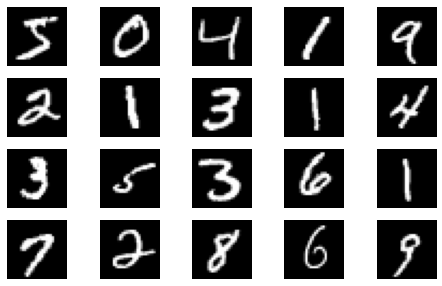

In [ ]:
plt.figure(figsize=(8, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy(),'gray')
    plt.axis('off');
